My first solo flight in data exploration using Python. You can also find some guided data exploration labs in the same repository.

I followed data analytics framework this time. I looked at most postively and negatively correlated genes with survival months, and used a linear regression. Again, genes are not strongly correlated with survival months.

Load Data

In [1]:
# Install dependencies (only once, if not already installed)
# !pip install kagglehub[pandas-datasets]

import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from kagglehub import KaggleDatasetAdapter
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set the path to the CSV file you want to load (example file name)
file_path = "METABRIC_RNA_Mutation.csv"  # or whatever the correct file name is

# Load the dataset into a DataFrame
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "raghadalharbi/breast-cancer-gene-expression-profiles-metabric",
    file_path
)

#print("First 5 records:\n", df.head())


/tmp/ipykernel_4947/2377862471.py:22: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


/opt/conda/lib/python3.12/site-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


Gene Expressions

In [2]:
mutation_cols = [
    "brca1", "brca2", "palb2", "pten", "tp53", "atm", "cdh1", "chek2", "nbn", "nf1", "stk11", "bard1", "mlh1", "msh2", "msh6", 
    "pms2", "epcam", "rad51c", "rad51d", "rad50", "rb1", "rbl1", "rbl2", "ccna1", "ccnb1", "cdk1", "ccne1", "cdk2", "cdc25a", 
    "ccnd1", "cdk4", "cdk6", "ccnd2", "cdkn2a", "cdkn2b", "myc", "cdkn1a", "cdkn1b", "e2f1", "e2f2", "e2f3", "e2f4", "e2f5", 
    "e2f6", "e2f7", "e2f8", "src", "jak1", "jak2", "stat1", "stat2", "stat3", "stat5a", "stat5b", "mdm2", "tp53bp1", "adam10", 
    "adam17", "aph1a", "aph1b", "arrdc1", "cir1", "ctbp1", "ctbp2", "cul1", "dll1", "dll3", "dll4", "dtx1", "dtx2", "dtx3", 
    "dtx4", "ep300", "fbxw7", "hdac1", "hdac2", "hes1", "hes5", "heyl", "itch", "jag1", "jag2", "kdm5a", "lfng", "maml1", "maml2", 
    "maml3", "ncor2", "ncstn", "notch1", "notch2", "notch3", "nrarp", "numb", "numbl", "psen1", "psen2", "psenen", "rbpj", 
    "rbpjl", "rfng", "snw1", "spen", "hes2", "hes4", "hes7", "hey1", "hey2", "acvr1", "acvr1b", "acvr1c", "acvr2a", "acvr2b", 
    "acvrl1", "akt1", "akt1s1", "akt2", "apaf1", "arl11", "atr", "aurka", "bad", "bcl2", "bcl2l1", "bmp10", "bmp15", "bmp2", 
    "bmp3", "bmp4", "bmp5", "bmp6", "bmp7", "bmpr1a", "bmpr1b", "bmpr2", "braf", "casp10", "casp3", "casp6", "casp7", "casp8", 
    "casp9", "chek1", "csf1", "csf1r", "cxcl8", "cxcr1", "cxcr2", "dab2", "diras3", "dlec1", "dph1", "egfr", "eif4e", "eif4ebp1", 
    "eif5a2", "erbb2", "erbb3", "erbb4", "fas", "fgf1", "fgfr1", "folr1", "folr2", "folr3", "foxo1", "foxo3", "gdf11", "gdf2", 
    "gsk3b", "hif1a", "hla-g", "hras", "igf1", "igf1r", "inha", "inhba", "inhbc", "itgav", "itgb3", "izumo1r", "kdr", "kit", "kras", 
    "map2k1", "map2k2", "map2k3", "map2k4", "map2k5", "map3k1", "map3k3", "map3k4", "map3k5", "mapk1", "mapk12", "mapk14", 
    "mapk3", "mapk4", "mapk6", "mapk7", "mapk8", "mapk9", "mdc1", "mlst8", "mmp1", "mmp10", "mmp11", "mmp12", "mmp13", "mmp14", 
    "mmp15", "mmp16", "mmp17", "mmp19", "mmp2", "mmp21", "mmp23b", "mmp24", "mmp25", "mmp26", "mmp27", "mmp28", "mmp3", "mmp7", 
    "mmp9", "mtor", "nfkb1", "nfkb2", "opcml", "pdgfa", "pdgfb", "pdgfra", "pdgfrb", "pdpk1", "peg3", "pik3ca", "pik3r1", "pik3r2", 
    "plagl1", "ptk2", "rab25", "rad51", "raf1", "rassf1", "rheb", "rictor", "rps6", "rps6ka1", "rps6ka2", "rps6kb1", "rps6kb2", 
    "rptor", "slc19a1", "smad1", "smad2", "smad3", "smad4", "smad5", "smad6", "smad7", "smad9", "sptbn1", "terc", "tert", "tgfb1", 
    "tgfb2", "tgfb3", "tgfbr1", "tgfbr2", "tgfbr3", "tsc1", "tsc2", "vegfa", "vegfb", "wfdc2", "wwox", "zfyve9", "arid1a", "arid1b", 
    "cbfb", "gata3", "kmt2c", "kmt2d", "myh9", "ncor1", "pde4dip", "ptprd", "ros1", "runx1", "tbx3", "abcb1", "abcb11", "abcc1", 
    "abcc10", "bbc3", "bmf", "cyp2c8", "cyp3a4", "fgf2", "fn1", "map2", "map4", "mapt", "nr1i2", "slco1b3", "tubb1", "tubb4a", 
    "tubb4b", "twist1", "adgra2", "afdn", "aff2", "agmo", "agtr2", "ahnak", "ahnak2", "akap9", "alk", "apc", "arid2", "arid5b", 
    "asxl1", "asxl2", "bap1", "bcas3", "birc6", "cacna2d3", "ccnd3", "chd1", "clk3", "clrn2", "col12a1", "col22a1", "col6a3", 
    "ctcf", "ctnna1", "ctnna3", "dnah11", "dnah2", "dnah5", "dtwd2", "fam20c", "fanca", "fancd2", "flt3", "foxp1", "frmd3", "gh1", 
    "gldc", "gpr32", "gps2", "hdac9", "herc2", "hist1h2bc", "kdm3a", "kdm6a", "klrg1", "l1cam", "lama2", "lamb3", "large1", "ldlrap1", 
    "lifr", "lipi", "magea8", "map3k10", "map3k13", "men1", "mtap", "muc16", "myo1a", "myo3a", "ncoa3", "nek1", "nf2", "npnt", 
    "nr2f1", "nr3c1", "nras", "nrg3", "nt5e", "or6a2", "palld", "pbrm1", "ppp2cb", "ppp2r2a", "prkacg", "prkce", "prkcq", "prkcz", 
    "prkg1", "prps2", "prr16", "ptpn22", "ptprm", "rasgef1b", "rpgr", "ryr2", "sbno1", "setd1a", "setd2", "setdb1", "sf3b1", "sgcd", 
    "shank2", "siah1", "sik1", "sik2", "smarcb1", "smarcc1", "smarcc2", "smarcd1", "spaca1", "stab2", "stmn2", "syne1", "taf1", "taf4b", 
    "tbl1xr1", "tg", "thada", "thsd7a", "ttyh1", "ubr5", "ush2a", "usp9x", "utrn", "zfp36l1", "ackr3", "akr1c1", "akr1c2", "akr1c3", 
    "akr1c4", "akt3", "ar", "bche", "cdk8", "cdkn2c", "cyb5a", "cyp11a1", "cyp11b2", "cyp17a1", "cyp19a1", "cyp21a2", "cyp3a43", 
    "cyp3a5", "cyp3a7", "ddc", "hes6", "hsd17b1", "hsd17b10", "hsd17b11", "hsd17b12", "hsd17b13", "hsd17b14", "hsd17b2", "hsd17b3", 
    "hsd17b4", "hsd17b6", "hsd17b7", "hsd17b8", "hsd3b1", "hsd3b2", "hsd3b7", "mecom", "met", "ncoa2", "nrip1", "pik3r3", "prkci", 
    "prkd1", "ran", "rdh5", "sdc4", "serpini1", "shbg", "slc29a1", "sox9", "spry2", "srd5a1", "srd5a2", "srd5a3", "st7", "star", 
    "tnk2", "tulp4", "ugt2b15", "ugt2b17", "ugt2b7"
]

print(len(mutation_cols))

489


Data Exploration

In [3]:
sampleCount, featureCount = df.shape
print(f"Number of Samples: {sampleCount} \nNumber of Features: {featureCount}")
print("\nData Types:\n", df.dtypes)
print("\nSummary of Numerical Features:\n", df.describe())

Number of Samples: 1904 
Number of Features: 693

Data Types:
 patient_id                  int64
age_at_diagnosis          float64
type_of_breast_surgery     object
cancer_type                object
cancer_type_detailed       object
                           ...   
hras_mut                   object
prps2_mut                  object
smarcb1_mut                object
stmn2_mut                  object
siah1_mut                  object
Length: 693, dtype: object

Summary of Numerical Features:
         patient_id  age_at_diagnosis  chemotherapy       cohort  \
count  1904.000000       1904.000000   1904.000000  1904.000000   
mean   3921.982143         61.087054      0.207983     2.643908   
std    2358.478332         12.978711      0.405971     1.228615   
min       0.000000         21.930000      0.000000     1.000000   
25%     896.500000         51.375000      0.000000     1.000000   
50%    4730.500000         61.770000      0.000000     3.000000   
75%    5536.250000         70.5925

In [4]:
numericData = df.select_dtypes(include=['number'])
rangeValues = numericData.max() - numericData.min()
print(f"Min:\n{numericData.min()}\n")
print(f"Max:\n{numericData.max()}\n")
print(f"Range:\n{rangeValues}\n")

Min:
patient_id                    0.0000
age_at_diagnosis             21.9300
chemotherapy                  0.0000
cohort                        1.0000
neoplasm_histologic_grade     1.0000
                              ...   
tnk2                         -3.8333
tulp4                        -3.6093
ugt2b15                      -1.1669
ugt2b17                      -2.1126
ugt2b7                       -1.0516
Length: 503, dtype: float64

Max:
patient_id                   7299.0000
age_at_diagnosis               96.2900
chemotherapy                    1.0000
cohort                          5.0000
neoplasm_histologic_grade       3.0000
                               ...    
tnk2                            3.9388
tulp4                           3.8334
ugt2b15                        10.8849
ugt2b17                        12.6439
ugt2b7                          3.2844
Length: 503, dtype: float64

Range:
patient_id                   7299.0000
age_at_diagnosis               74.3600
chemotherap

Missing Data

In [5]:
df.isnull().sum()

patient_id                 0
age_at_diagnosis           0
type_of_breast_surgery    22
cancer_type                0
cancer_type_detailed      15
                          ..
hras_mut                   0
prps2_mut                  0
smarcb1_mut                0
stmn2_mut                  0
siah1_mut                  0
Length: 693, dtype: int64

Data Exploration

In [6]:
# Make a copy to avoid modifying the original DataFrame
df_surgery = df[['overall_survival_months', 'type_of_breast_surgery']].copy()

# Map surgery type to binary: MASTECTOMY = 1, BREAST CONSERVING = 0
surgery_map = {
    'MASTECTOMY': 1,
    'BREAST CONSERVING': 0
}
df_surgery['type_of_breast_surgery'] = df_surgery['type_of_breast_surgery'].map(surgery_map)

correlation_matrix = df_surgery.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                          overall_survival_months  type_of_breast_surgery
overall_survival_months                 1.000000               -0.096497
type_of_breast_surgery                 -0.096497                1.000000


In [7]:
relevant_cols = ['overall_survival_months'] + mutation_cols
df_mutations = df[relevant_cols].copy()

correlation_matrix = df_mutations.corr()

survival_corr = correlation_matrix['overall_survival_months'].drop('overall_survival_months')
print("\nCorrelation with Overall Survival Months:\n", survival_corr.sort_values(ascending=False))


Correlation with Overall Survival Months:
 bcl2      0.165202
tsc1      0.163396
hsd3b7    0.163043
stat5b    0.162798
igf1r     0.144011
            ...   
aurka    -0.151879
adam17   -0.155302
mapk14   -0.165130
pdpk1    -0.168408
sf3b1    -0.181046
Name: overall_survival_months, Length: 489, dtype: float64


In [8]:
sorted_correlations = survival_corr.sort_values(ascending=False)

most_positively_correlated = sorted_correlations.index[0]
most_negatively_correlated = sorted_correlations.index[-1]

print("\nMost Positively Correlated Feature:", most_positively_correlated)
print("Most Negatively Correlated Feature:", most_negatively_correlated)


Most Positively Correlated Feature: bcl2
Most Negatively Correlated Feature: sf3b1


Linear Regression

In [28]:
def plot_with_regression(feature_name, title_suffix):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature_name], y=df['overall_survival_months'])
    plt.xlabel(feature_name)
    plt.ylabel("Overall Survival Months")
    plt.title(f"{title_suffix}: {feature_name} vs. Survival")
    
    # Fit linear regression
    X = df[feature_name].values.reshape(-1, 1)
    y = df['overall_survival_months'].values
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    
    # Plot regression line
    plt.plot(df[feature_name], y_pred, color='red')
    plt.show()

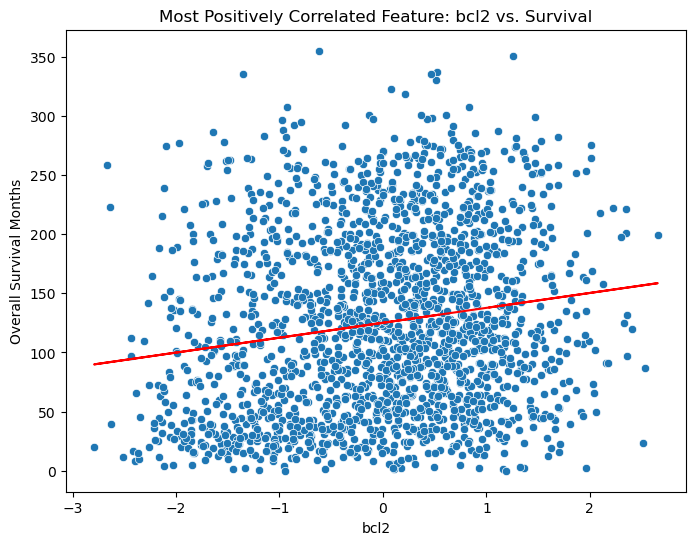

In [10]:
plot_with_regression(most_positively_correlated, "Most Positively Correlated Feature")

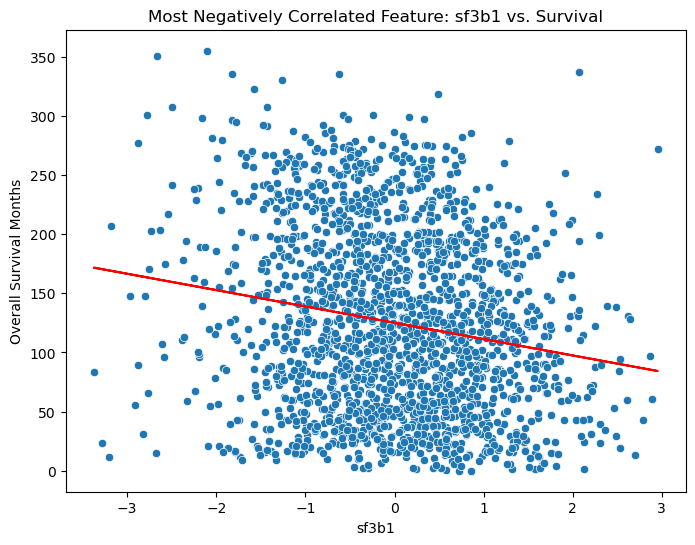

In [11]:
plot_with_regression(most_negatively_correlated, "Most Negatively Correlated Feature")

Ordinary Least Squares Model

In [12]:
def plot_statsmodel_regression(feature_name, title_suffix):
    
    X = df[feature_name]
    y = df['overall_survival_months']
    X_dummy = sm.add_constant(X)
    
    ols = sm.OLS(y, X_dummy)
    model = ols.fit()
    y_pred = model.predict(X_dummy)
    
    intercept = model.params[0]
    slope = model.params[1]
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    rsquared = model.rsquared

    return model, intercept, slope, mse, rmse, rsquared


bcl2 Regression Stats

In [ ]:
model, intercept, slope, mse, rmse, rsquared = plot_statsmodel_regression('bcl2', 'bcl2 Expression')

/tmp/ipykernel_4947/1853677929.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/tmp/ipykernel_4947/1853677929.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


In [14]:
print('statsmodel intercept: ', intercept)
print('statsmodel slope:     ', slope)
print('statsmodel mse:       ', mse)
print('statsmodel rmse:      ', rmse)
print('statsmodel R^2 score: ', rsquared)

statsmodel intercept:  125.12133147499152
statsmodel slope:      12.607247340084486
statsmodel mse:        5664.899717229362
statsmodel rmse:       75.26552808045236
statsmodel R^2 score:  0.027291628746384577


In [15]:
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     overall_survival_months   R-squared:                       0.027
Model:                                 OLS   Adj. R-squared:                  0.027
Method:                      Least Squares   F-statistic:                     53.37
Date:                     Thu, 01 May 2025   Prob (F-statistic):           4.05e-13
Time:                             20:04:02   Log-Likelihood:                -10929.
No. Observations:                     1904   AIC:                         2.186e+04
Df Residuals:                         1902   BIC:                         2.187e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

sf3b1 Regression Stats

In [16]:
model, intercept, slope, mse, rmse, rsquared = plot_statsmodel_regression('sf3b1', 'sf3b1 Expression')

/tmp/ipykernel_4947/1853677929.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/tmp/ipykernel_4947/1853677929.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


In [17]:
print('statsmodel intercept: ', intercept)
print('statsmodel slope:     ', slope)
print('statsmodel mse:       ', mse)
print('statsmodel rmse:      ', rmse)
print('statsmodel R^2 score: ', rsquared)

statsmodel intercept:  125.12131409581956
statsmodel slope:      -13.816343571079333
statsmodel mse:        5632.950280683494
statsmodel rmse:       75.05298315645751
statsmodel R^2 score:  0.032777601303053405


In [18]:
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     overall_survival_months   R-squared:                       0.033
Model:                                 OLS   Adj. R-squared:                  0.032
Method:                      Least Squares   F-statistic:                     64.46
Date:                     Thu, 01 May 2025   Prob (F-statistic):           1.71e-15
Time:                             20:04:02   Log-Likelihood:                -10924.
No. Observations:                     1904   AIC:                         2.185e+04
Df Residuals:                         1902   BIC:                         2.186e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

Attempting Standardization

In [19]:
bcl2_data = df[['bcl2', 'overall_survival_months']].dropna()

scaler = StandardScaler()
bcl2_scaled = scaler.fit_transform(bcl2_data[['bcl2']])

new_df = pd.DataFrame({
    'bcl2_scaled': bcl2_scaled.flatten(),
    'overall_survival_months': bcl2_data['overall_survival_months'].values
})

In [22]:
df['bcl2_scaled'] = bcl2_scaled.flatten()

model, intercept, slope, mse, rmse, rsquared = plot_statsmodel_regression('bcl2_scaled', 'Standardized bcl2 Expression')


/tmp/ipykernel_4947/1853677929.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/tmp/ipykernel_4947/1853677929.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


In [23]:
print('statsmodel intercept: ', intercept)
print('statsmodel slope:     ', slope)
print('statsmodel mse:       ', mse)
print('statsmodel rmse:      ', rmse)
print('statsmodel R^2 score: ', rsquared)

statsmodel intercept:  125.12132352924739
statsmodel slope:      12.607225291880845
statsmodel mse:        5664.899717229362
statsmodel rmse:       75.26552808045236
statsmodel R^2 score:  0.027291628746384577


The current scaling did not strongly impact scores indicating weak correlation :(

Controlling for tumor stage when diagnosed/treated.

In [24]:
tumor_stage_range = df['tumor_stage'].unique()

print("Tumor stages in the dataset:", tumor_stage_range)

Tumor stages in the dataset: [ 2.  1.  4.  3. nan  0.]


In [26]:
#Cleaning and converting to only early stages
df_cleaned = df.dropna(subset=['tumor_stage'])

early_stage_df = df_cleaned[df_cleaned['tumor_stage'].isin([1, 2])]

print(early_stage_df['tumor_stage'].unique())

[2. 1.]


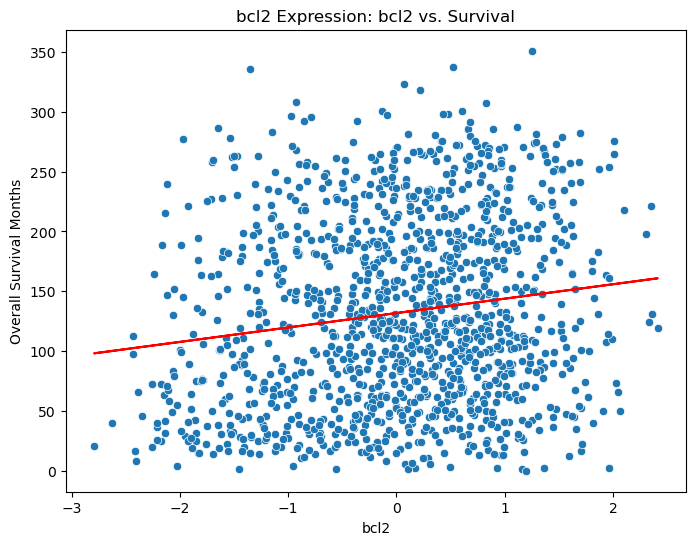

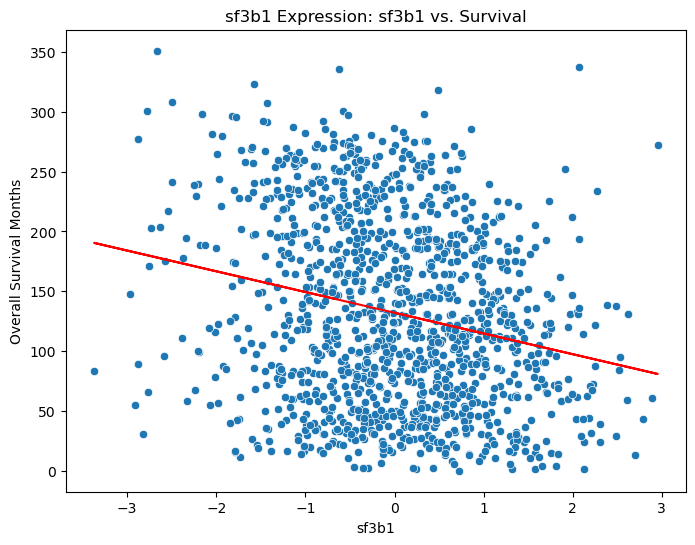

In [30]:
df = early_stage_df  # Use early_stage_df as the dataset
plot_with_regression('bcl2', 'bcl2 Expression')

# Plot for sf3b1 expression vs. overall survival months (for Stage 1 and Stage 2)
plot_with_regression('sf3b1', 'sf3b1 Expression')

In [31]:
model, intercept, slope, mse, rmse, rsquared = plot_statsmodel_regression('bcl2', 'bcl2 Expression')

print('statsmodel intercept: ', intercept)
print('statsmodel slope:     ', slope)
print('statsmodel mse:       ', mse)
print('statsmodel rmse:      ', rmse)
print('statsmodel R^2 score: ', rsquared)

statsmodel intercept:  131.81352870111448
statsmodel slope:      12.049427813163465
statsmodel mse:        5851.204051479152
statsmodel rmse:       76.4931634296762
statsmodel R^2 score:  0.023530498564121927


/tmp/ipykernel_4947/1853677929.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/tmp/ipykernel_4947/1853677929.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


In [32]:
model, intercept, slope, mse, rmse, rsquared = plot_statsmodel_regression('sf3b1', 'sf3b1 Expression')

print('statsmodel intercept: ', intercept)
print('statsmodel slope:     ', slope)
print('statsmodel mse:       ', mse)
print('statsmodel rmse:      ', rmse)
print('statsmodel R^2 score: ', rsquared)

statsmodel intercept:  132.08078437951775
statsmodel slope:      -17.312869221729684
statsmodel mse:        5677.922386016409
statsmodel rmse:       75.35198992738287
statsmodel R^2 score:  0.05244835205097964


/tmp/ipykernel_4947/1853677929.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
/tmp/ipykernel_4947/1853677929.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


Controlling for stage of cancer did not change much. Looking at mutation count vs. survival months.

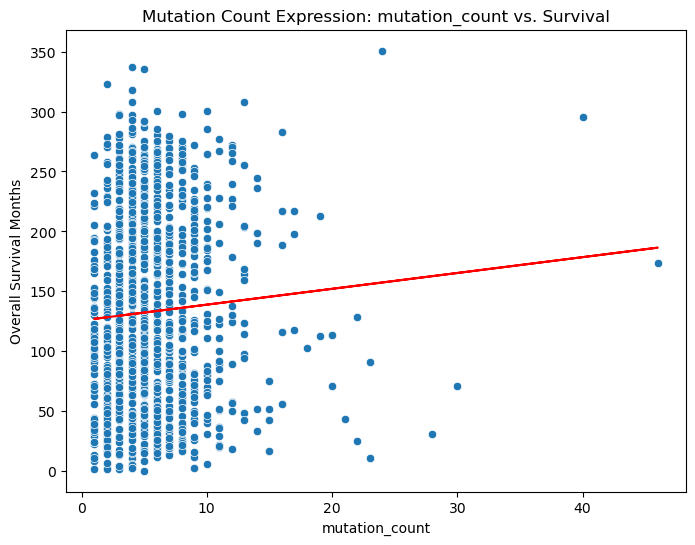

In [41]:
cleaned_df = df.dropna(subset=['mutation_count', 'overall_survival_months'])

df = cleaned_df

plot_with_regression('mutation_count', 'Mutation Count Expression')

Not helpful. Looking at age of diagnosis.

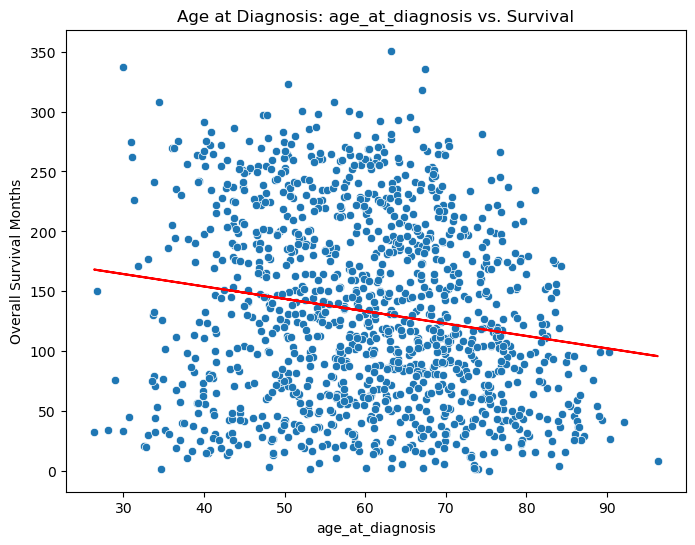

In [42]:
plot_with_regression('age_at_diagnosis', 'Age at Diagnosis')